In [2]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [6]:
df = pd.read_csv('PL04Charge.csv',index_col=0)
df

,max_charge
0,0.275269
1,0.275262
2,0.275268
3,0.275206
4,0.275209
5,0.275247
6,0.275240
7,0.275254
8,0.275236
9,0.275249


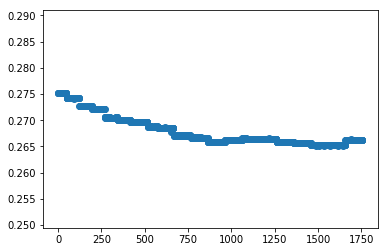

cost:  0.85029733
cost:  0.48996627
cost:  0.34604788
cost:  0.19764523
cost:  0.4145521
cost:  0.33780196
cost:  0.14835891
W:  [[-1.3177288]] b:  [0.03176117]


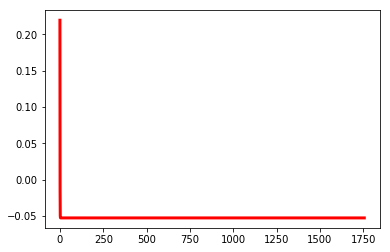

In [8]:
x_data = df.index
y_data = df['max_charge']
 
#show the data
plt.scatter(x_data, y_data)
plt.show()
 
#create a model
model = Sequential()
#add a dense
#model.add(Dense(units=1, input_dim=1))
 
#1-10-1
model.add(Dense(units=1, input_dim=1,activation='tanh'))
#model.add(Activation('tanh'))
model.add(Dense(units=1,activation='tanh'))

#model.add(Activation('tanh'))
 
sgd = SGD(lr=0.3)
model.compile(optimizer=sgd, loss='mae')
 
#train 3001 batch
for step in range(3001):
    #each time train a batch
    cost = model.train_on_batch(x_data, y_data)
    
    #print the cost
    if step % 500 == 0:
        print('cost: ', cost)


W,b = model.layers[0].get_weights()
print('W: ', W, 'b: ', b)
    
#get the pred y
y_pred  = model.predict(x_data)
 
#plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r-', lw=3)
plt.show()